In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import wecopttool as wot
import mhkit 
import peaks

## create wave

In [2]:
f1, nfreq = 0.001, 10000
direction = 0.0
Tp, Hs = 5.0, 1.2
spectrum_func = lambda f: wot.waves.pierson_moskowitz_spectrum(f, fp=1/Tp, hs=Hs)
spectrum_name = f"Pierson-Moskowitz ({Tp}s, {Hs}m)"

efth = wot.waves.omnidirectional_spectrum(f1, nfreq, spectrum_func, spectrum_name)
wave = wot.waves.long_crested_wave(efth, direction)

## test spectrum

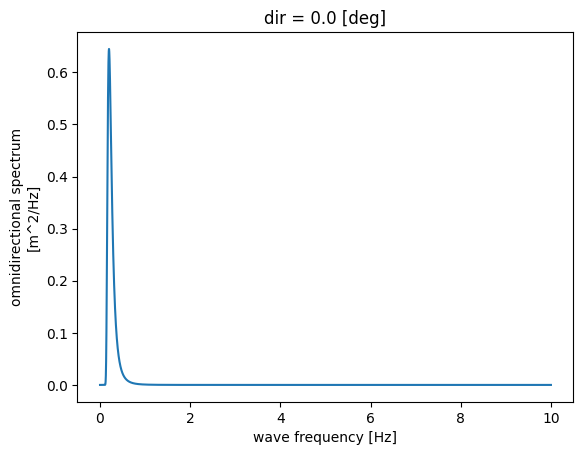

In [3]:
efth.plot()

In [4]:
S = efth.to_dataframe("S").reset_index().set_index("freq").drop(["dir",], axis=1)
Hs, mhkit.significant_wave_height(S).values[0][0]

(1.2, 1.1999998801924185)

## test time-series

In [22]:
A = wave.values.squeeze()
w = wave.omega.values
t = wot.time(f1, nfreq)
t_mat = wot.time_mat(f1, nfreq, zero_freq=False)
# wave_ts = t_mat @ wot.complex_to_real(A, False)
wave_ts = wot.fd_to_td(wave.values, f1, nfreq, False)

<AxesSubplot: xlabel='t'>

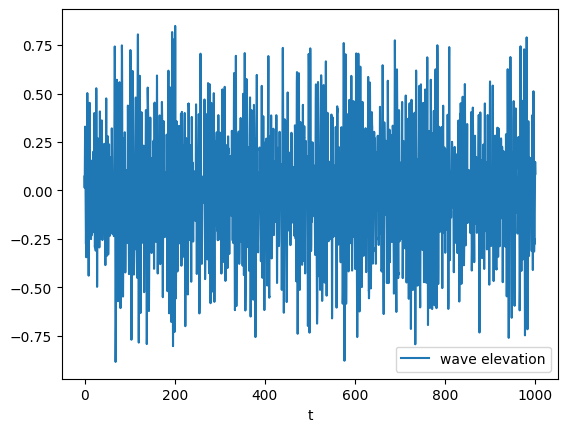

In [19]:
# plt.plot(t, wave_ts)
wave_ts = pd.DataFrame(
    np.concatenate([np.expand_dims(t, -1), wave_ts], axis=1),
    columns=["t", "wave elevation"]
).set_index("t")

wave_ts.plot()

In [16]:
S_data = mhkit.elevation_spectrum(
    wave_ts, 
    # f1,
    1/t[1], 
    len(wave_ts.values),
    detrend=False, 
    window="boxcar",
    noverlap=0,
)
Hs, mhkit.significant_wave_height(S_data).values[0][0]

(1.2, 1.2264138576409105)

<AxesSubplot: >

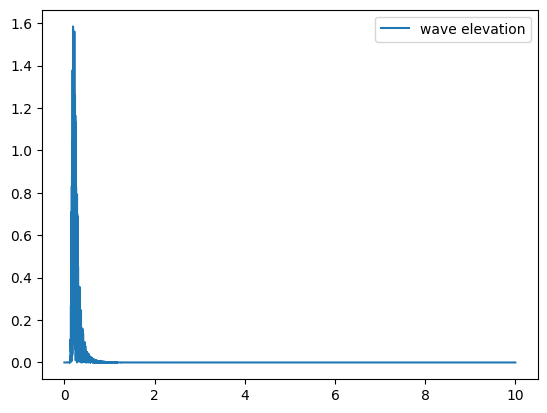

In [17]:
S_data.plot()

## MHKiT time-series

<AxesSubplot: >

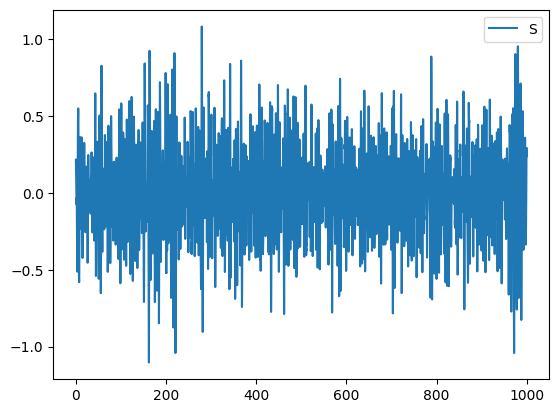

In [9]:
wave_ts_mhkit = mhkit.surface_elevation(S, t)
wave_ts_mhkit.plot()

## Peaks

In [10]:
t_peaks, wpeaks = peaks.global_peaks(t, np.squeeze(wave_ts.values))

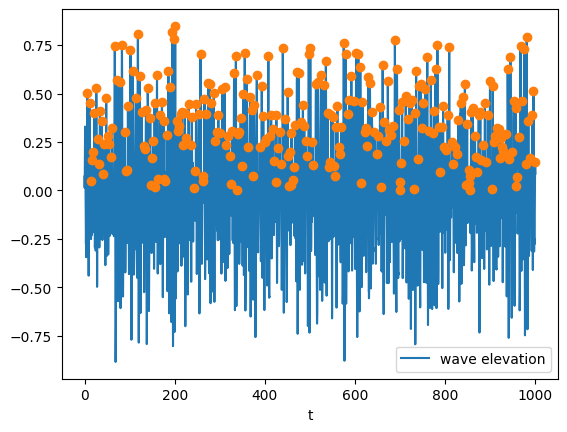

In [11]:
wave_ts.plot()
plt.plot(t_peaks, wpeaks, 'o')
# plt.xlim([0,100])

In [12]:
npeaks = len(wpeaks)
third_peaks = np.sort(wpeaks)[int(np.floor(npeaks/3)):]

Hs, np.mean(third_peaks)

(1.2, 0.46925685804219647)